0.8571428571428571


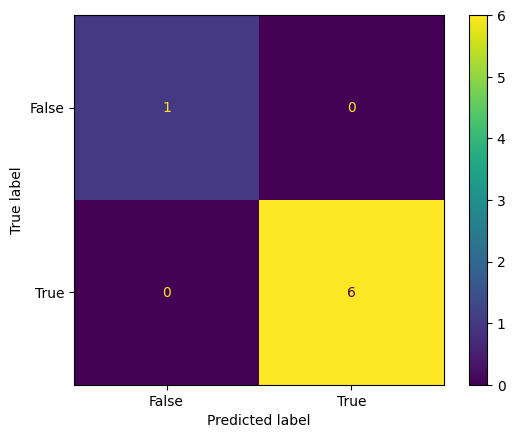

|--- jml_phsl <= -0.29
|   |--- jml_phsl <= -0.98
|   |   |--- class: 0
|   |--- jml_phsl >  -0.98
|   |   |--- class: 1
|--- jml_phsl >  -0.29
|   |--- jml_art <= 0.77
|   |   |--- jml_art <= -0.43
|   |   |   |--- class: 0
|   |   |--- jml_art >  -0.43
|   |   |   |--- status_tmpt <= -0.18
|   |   |   |   |--- class: 0
|   |   |   |--- status_tmpt >  -0.18
|   |   |   |   |--- class: 1
|   |--- jml_art >  0.77
|   |   |--- class: 1



In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Load data
data_train = pd.read_csv('data_train1.csv')
data_test = pd.read_csv('data_test.csv')

# Preprocess data
X_train_awal = data_train.drop('hasil', axis=1)
X_train = np.array(X_train_awal.values)
y_train_awal = data_train['hasil']
y_train = np.array(y_train_awal.values)

X_test_awal = data_test.drop('hasil', axis=1)
X_test = pd.DataFrame(X_test_awal.values)
y_test_awal = data_test['hasil']
y_test = pd.DataFrame(y_test_awal.values)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
X_test_prediction = clf.predict(X_test)
X_test_predictionl = clf.predict(X_train)

# Evaluate model
X_test_awal['label_asli'] = y_test_awal
X_test_awal['label_pred'] = X_test_prediction
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(test_data_accuracy)

#Confussion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_test_awal)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

# Decision Tree Text Representation
from sklearn import tree
text_representation = tree.export_text(clf, feature_names=["jenis_pkj", "jml_phsl", "jml_art", "pengeluaran", "status_tmpt"])
print(text_representation)

# Decision Tree Graph
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=["jenis_pkj", "jml_phsl", "jml_art", "pengeluaran", "status_tmpt"],
                                class_names=['0', '1'], filled=True, max_depth=3)

graph = graphviz.Source(dot_data, format="png")

Train Accuracy: 1.0
Test Accuracy: 0.7402597402597403


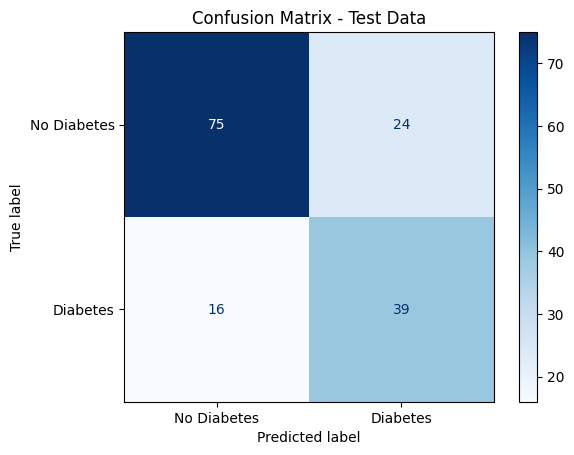

Decision Tree Text Representation:
 |--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- SkinThickness <= 8.50
|   |   |   |   |   |   |--- Glucose <= 109.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Glucose >  109.50
|   |   |   |   |   |   |   |--- Glucose <= 123.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Glucose >  123.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   

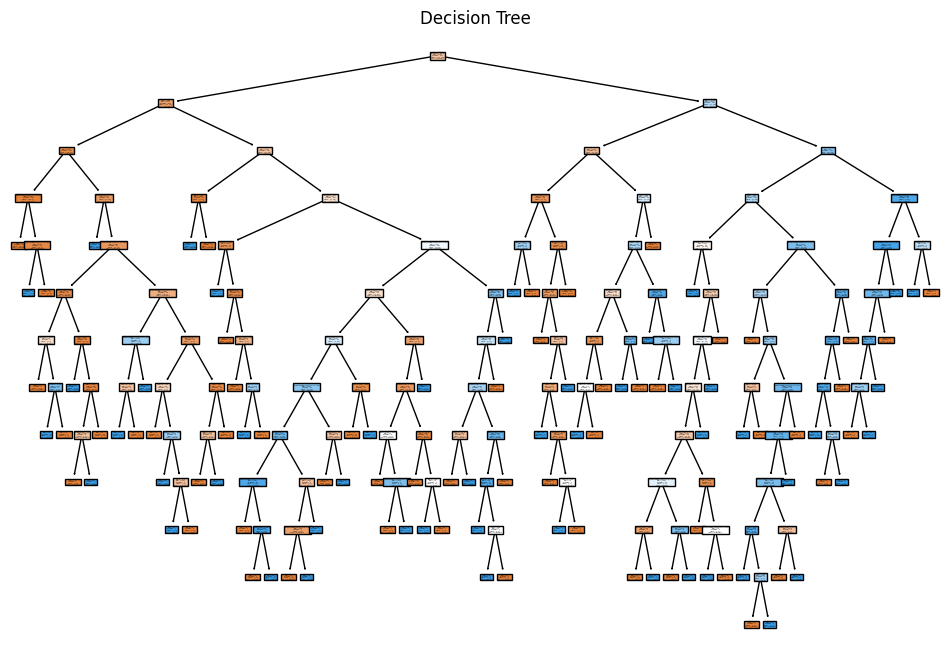

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_text, export_graphviz

# Load data
data = pd.read_csv('diabetes_dataset.csv')

# Preprocess data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['No Diabetes', 'Diabetes'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Decision Tree Text Representation
text_representation = export_text(clf, feature_names=X.columns.tolist())
print("Decision Tree Text Representation:\n", text_representation)

# Decision Tree Graph
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns.tolist(),
                           class_names=['No Diabetes', 'Diabetes'], filled=True, max_depth=3)
graph = graphviz.Source(dot_data)
graph.render("diabetes_decision_tree", format="png", cleanup=True)

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree")
plt.show()
